In [1]:
import array
import random
import matplotlib.pyplot as plt
import time
import numpy as np
from pymoo.model.problem import Problem
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.algorithms.rnsga2 import RNSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation
from pymoo.factory import get_termination
from pymoo.optimize import minimize
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter



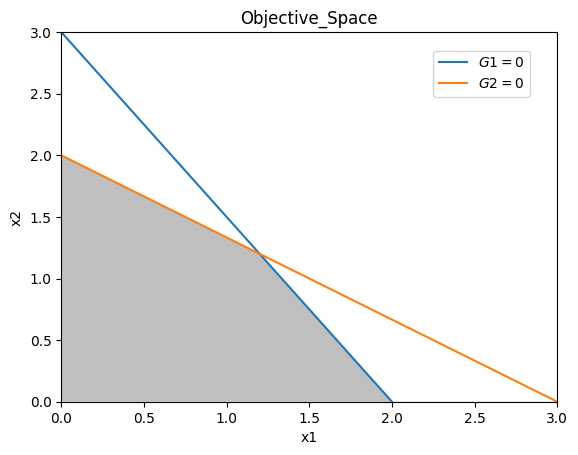

In [2]:
## 绘制目标区域
x = np.linspace(0,5,100)
a1 = (-3 / 2)*x + 3
a2 = (-2 / 3)*x + 2
plt.plot(x,a1,label=r'$G1=0$')
plt.plot(x,a2,label=r'$G2=0$')
a3 = np.minimum(a1,a2)
plt.fill_between(x,0,a3, where=a3,facecolor='grey', alpha=0.5)
plt.xlim(0,3)
plt.ylim(0,3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(bbox_to_anchor=(0.75, 0.95), loc=2, borderaxespad=0.)
plt.title('Objective_Space')
plt.savefig('Objective_Space.jpg')

In [3]:
class MyProblem(Problem):

    def __init__(self):
        super(MyProblem, self).__init__(
            n_var = 2,  # 变量数量
            n_obj = 2,  # 优化目标的数量
            n_constr = 2,  # 约束的数量
            xl = np.array([0, 0]),  # 变量的下限
            xu = np.array([100,100])
        )

    def _evaluate(self, x, out, *args, **kwargs):

        # 定义目标函数
        f1 = 2 * x[:, 0] - x[:, 1]    # x1放在x的第0列，x2放在x的第一列
        f2 = -3 * x[:, 0] + x[:, 1]
        # 定义约束条件
        g1 = 3 * x[:, 0] + 2 * x[:, 1] - 6
        g2 = 2 * x[:, 0] + 3 * x[:, 1] - 6
        # todo
        out["F"] = np.column_stack([f1, f2])
        out["G"] = np.column_stack([g1, g2])


In [4]:
##使用NSGA2优化
algorithm = NSGA2(
    pop_size=40,  # 种群数量
    n_offsprings=10,  # 后代数量
    sampling=get_sampling("real_random"),  # 采样的方式，如随机采样
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),  # 交配方式，如模拟二进制
    mutation=get_mutation("real_pm", eta=20),  # 变异方式，多项式变异
    eliminate_duplicates=True   # 确保后代的目标值不同
)


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.configuration import Configuration
Configuration.show_compile_hint = False



n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  | delta_ideal  | delta_nadir  |   delta_f   
    1 |      40 |  5.00495E+01 |  4.54279E+02 |       1 |            - |            - |            -
    2 |      50 |  5.00495E+01 |  3.40298E+02 |       1 |  0.00000E+00 |  0.00000E+00 |  0.00000E+00
    3 |      60 |  5.00495E+01 |  2.69057E+02 |       1 |  0.00000E+00 |  0.00000E+00 |  0.00000E+00
    4 |      70 |  5.00410E+01 |  2.25686E+02 |       1 |  3.487876805 |  3.487876805 |  4.36010E+30
    5 |      80 |  5.00410E+01 |  1.88583E+02 |       1 |  0.00000E+00 |  0.00000E+00 |  0.00000E+00
    6 |      90 |  5.00410E+01 |  1.66922E+02 |       1 |  0.00000E+00 |  0.00000E+00 |  0.00000E+00
    7 |     100 |  3.15640E+01 |  1.46109E+02 |       1 |  1.49879E+01 |  1.49879E+01 |  1.81955E+31
    8 |     110 |  2.60565E+01 |  1.20093E+02 |       1 |  2.727450154 |  2.727450154 |  3.58132E+30
    9 |     120 |  1.59232E+01 |  1.00967E+02 |       1 |  2.037031166 |  2.037031166 |  2.

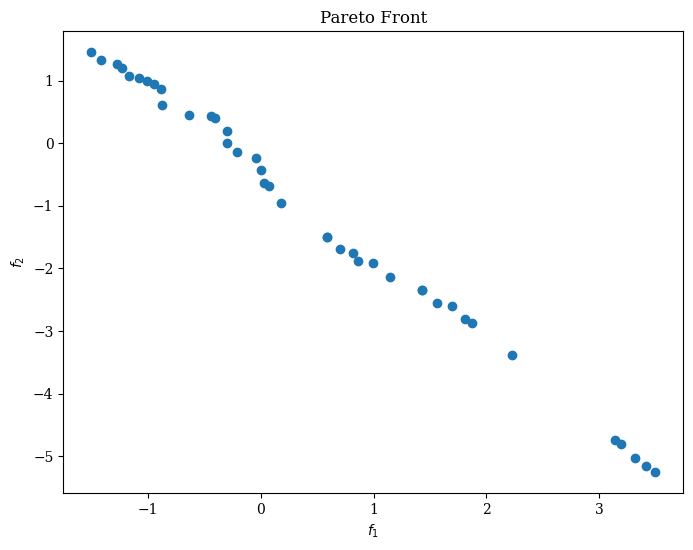

In [9]:
termination = get_termination("n_gen", 40)

res = minimize(
    problem=MyProblem(),
    algorithm=algorithm,
    termination=termination,
    seed=1,
    save_history=True,
    verbose=True    # 输出控制变量
)


Scatter().add(res.F).show()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.title("Pareto Front")
plt.savefig('Pareto Front.jpg')

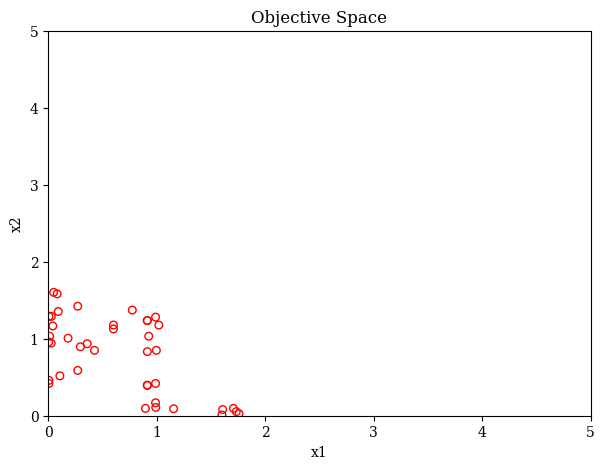

In [6]:
xl = np.array([0, 0]) # 变量的下限
xu = np.array([5, 5])
X = res.X
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, facecolors='none', edgecolors='r')
Scatter().add(res.F)
plt.xlim(xl[0], xu[0])
plt.ylim(xl[1], xu[1])
plt.title("Objective Space")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [7]:
#目标函数的尺度
fl = X.min(axis=0)
fu = X.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

Scale f1: [0.005046675444567304, 1.7598187944703096]
Scale f2: [0.010258875253427557, 1.6026539969637403]


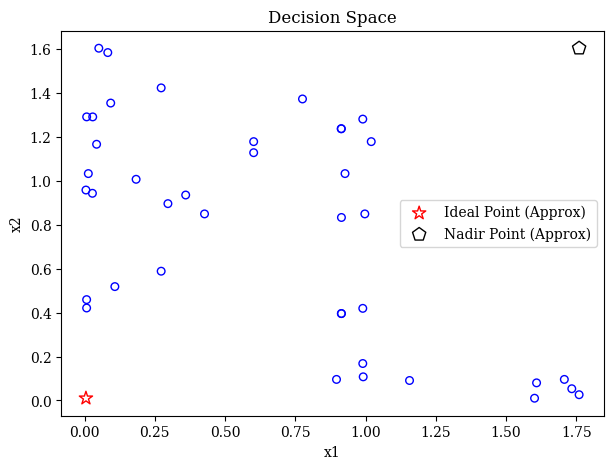

In [8]:
#理想点和最低点(ideal and nadir point)
approx_ideal = X.min(axis=0)
approx_nadir = X.max(axis=0)
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
plt.title("Decision Space")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.savefig('Decision_Space.jpg')
plt.show()